<b>¡Hola Camilo!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.
¡Empecemos!


In [1]:
import pandas as pd 
import math as mt 
import numpy as np 
from scipy import stats as st 
from math import factorial 
import seaborn as sns  
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as stats

## Paso 1. Acceder a los datos y prepararlos para el análisis

In [2]:
#Traemos los datasets
visits=pd.read_csv('/datasets/visits_log_us.csv')
orders=pd.read_csv('/datasets/orders_log_us.csv')
costs=pd.read_csv('/datasets/costs_us.csv')

In [3]:
#Revisamos la información de los datasets 
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 

<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Has utilizado adecuadamente las funciones estadísticas para obtener una visión inicial de los conjuntos de datos. Este enfoque es esencial para comprender rápidamente el contexto y la estructura de los datos que estás analizando.
</div>


Es posible evidenciar la necesidad de cambiar algunas columnas a formato datetime, lo haremos a continuación:

In [4]:
#Para el dataframe visits:
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])

#Para el dataframe orders: 
orders['Buy Ts']=pd.to_datetime(orders['Buy Ts'])

#Para el dataframe costs: 
costs['dt']=pd.to_datetime(costs['dt'])

#Revisamos la información de los datasets 
visits.info()
orders.info()
costs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2

<div class="alert alert-block alert-success">
<b>Celda [4]</b> <a class="tocSkip"></a><br>
Has convertido correctamente las columnas de fecha a un formato datetime.
</div>


## Paso 2. Haz informes y calcula métricas

# Para el dataframe de visitas responderemos las siguientes preguntas: 

Antes de atender las preguntas, crearemos una columna "visit date" que contenga sólo la fecha.

In [5]:
#Creamos una columna únicamente con la fecha 
visits['visit_date'] = visits['Start Ts'].dt.date
visits['visit_date'] = pd.to_datetime(visits['visit_date'])


<div class="alert alert-block alert-success">
<b>Celda [5]</b> <a class="tocSkip"></a><br>
Crear una columna con solo la fecha de la visita es una excelente decisión para facilitar el análisis temporal y la agregación de datos. Esto te permitirá realizar análisis más detallados y específicos en el futuro.
</div>


### ¿Cuántas personas lo usan cada día, semana y mes?


In [6]:
# Usuarios únicos por día
daily_users = visits.groupby('visit_date')['Uid'].nunique()

# Usuarios únicos por semana
weekly_users = visits.resample('W-Mon', on='visit_date')['Uid'].nunique()

# Usuarios únicos por mes
monthly_users = visits.resample('M', on='visit_date')['Uid'].nunique()

# Usuarios únicos por día
daily_users.head(10)


visit_date
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
2017-06-06    797
2017-06-07    699
2017-06-08    868
2017-06-09    695
2017-06-10    350
Name: Uid, dtype: int64

In [7]:
# Usuarios únicos por semana
weekly_users.head(10)

visit_date
2017-06-05    2767
2017-06-12    3730
2017-06-19    2932
2017-06-26    2944
2017-07-03    3092
2017-07-10    3390
2017-07-17    4784
2017-07-24    3317
2017-07-31    2589
2017-08-07    2312
Freq: W-MON, Name: Uid, dtype: int64

In [8]:
# Usuarios únicos por mes
monthly_users.head(10)

visit_date
2017-06-30    13259
2017-07-31    14183
2017-08-31    11631
2017-09-30    18975
2017-10-31    29692
2017-11-30    32797
2017-12-31    31557
2018-01-31    28716
2018-02-28    28749
2018-03-31    27473
Freq: M, Name: Uid, dtype: int64

Ahora, considerando que los datos por meses están más consolidados, visualizaremos los datos obtenidos de personas que usaron Showz por mes. 

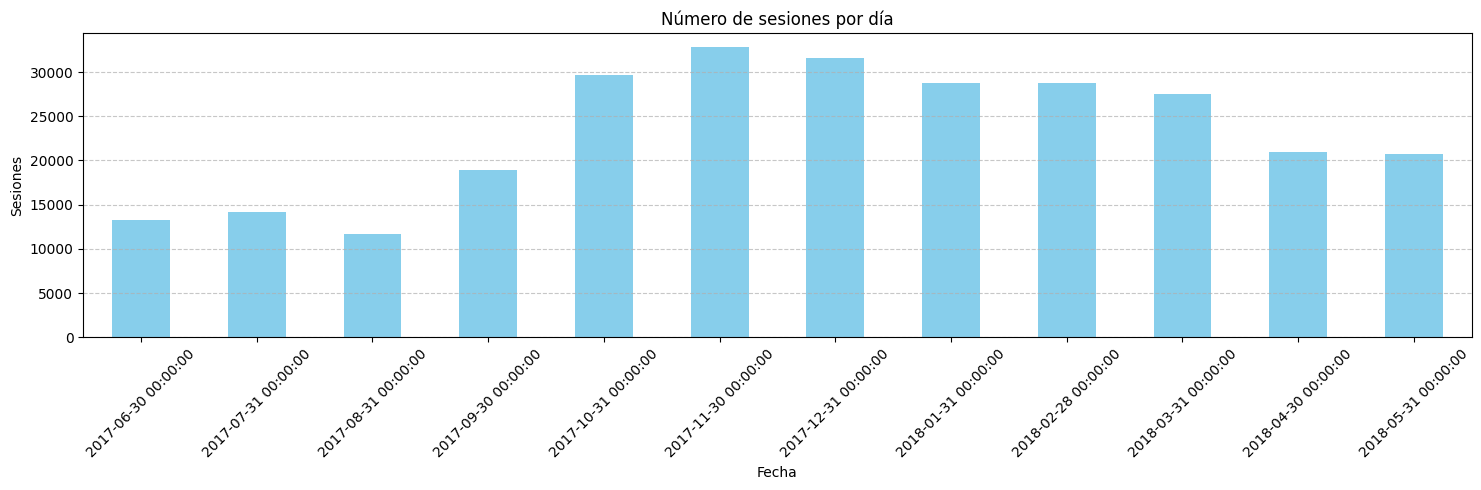

In [9]:
plt.figure(figsize=(15, 5))  
monthly_users.plot(kind='bar', color='skyblue')

plt.title('Número de sesiones por día')
plt.xlabel('Fecha')
plt.ylabel('Sesiones')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<div class="alert alert-block alert-warning">
<b>Celda [9]</b> <a class="tocSkip"></a><br>
El gráfico muestra el número de sesiones por día, pero el título indica que es por mes. Asegúrate de que el título del gráfico refleje correctamente los datos que se están visualizando para evitar confusiones.
</div>


Con la gráfica anterior, es posible evidenciar que el mayor uso de Showz se dió en noviembre de 2017 ¿Será porque se acercan las fiestas y festivales de fin de año? 

### ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión)

In [10]:
#Crearemos una variable que agrupará los datos de la columna "visit_date" por "Uid"
sessions_per_day = visits.groupby('visit_date')['Uid'].count()
print(sessions_per_day.head(10))

visit_date
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
2017-06-06    875
2017-06-07    788
2017-06-08    939
2017-06-09    755
2017-06-10    375
Name: Uid, dtype: int64


### ¿Cuál es la duración de cada sesión?

In [11]:
#Restaremos los datos de las columnas End Ts y Start Ts 
#La duración se mostrará en minutos
visits['session_duration']=(visits['End Ts']-visits['Start Ts']).dt.total_seconds() / 60
visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid,visit_date,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,18.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,28.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,24.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,0.0
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,1.0
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-30,56.0
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017-11-05,1.0
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017-07-19,3.0
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017-11-08,1.0


<div class="alert alert-success">
<b>Celda [11]</b> <a class="tocSkip"></a><br>
Has calculado correctamente la duración de las sesiones en minutos, lo cual es crucial para entender el comportamiento del usuario en el sitio. Esto proporciona una métrica valiosa para evaluar el compromiso y la interacción de los usuarios.
</div>


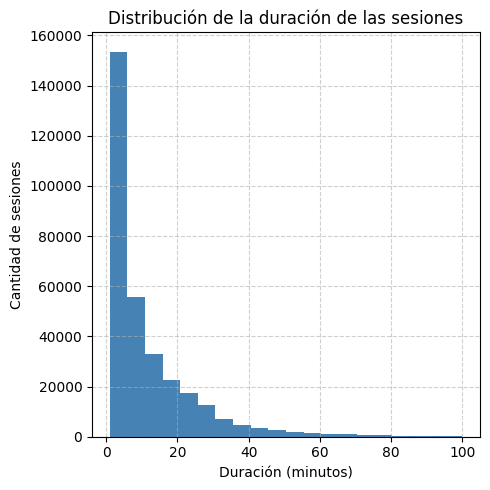

In [12]:
#Previendo que contaremos con datos atípicos, crearemos un límite de 30 segundos hasta 100 minutos de la sesión
visits_clean = visits[(visits['session_duration'] >= 0.5) & (visits['session_duration'] <= 100)]
#Integramos los paramétros para nuestro gráfico
plt.figure(figsize=(5, 5))  
visits_clean['session_duration'].dropna().hist(bins=20, color='steelblue')

plt.title('Distribución de la duración de las sesiones')
plt.xlabel('Duración (minutos)')
plt.ylabel('Cantidad de sesiones')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
<b>Celda [12]</b> <a class="tocSkip"></a><br>
Has establecido límites para la duración de las sesiones, lo cual es una buena práctica para manejar datos atípicos. Sería útil justificar estos valores basándote en algún criterio o estudio previo para mejorar la interpretación de los resultados. Considera explicar por qué elegiste estos límites para que otros puedan entender mejor tu enfoque.
</div>


Es posible evidenciar que un alto número de sesiones duran entre 0 a 10 minutos. 

### ¿Con qué frecuencia los usuarios regresas?

In [13]:
visits = visits.sort_values(by=['Uid', 'Start Ts'])
# Calcular la diferencia entre esta sesión y la anterior para cada usuario
visits['days_since_last_visit'] = visits.groupby('Uid')['Start Ts'].diff().dt.days
#Entendiendo que dado que algunos registros serán primeras visitas, por tanto, se presentarán valores NaN, reemplazaremos esos valores
visits['days_since_last_visit'] = visits['days_since_last_visit'].fillna('Primera visita')
visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid,visit_date,session_duration,days_since_last_visit
196543,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,11863502262781,2018-03-01,6.0,Primera visita
257333,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,49537067089222,2018-02-06,2.0,Primera visita
173818,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,297729379853735,2017-06-07,1.0,Primera visita
173142,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,313578113262317,2017-09-18,18.0,Primera visita
192554,desktop,2018-02-18 15:26:00,2,2018-02-18 15:17:00,313578113262317,2018-02-18,9.0,152.0
113873,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,313578113262317,2018-03-11,6.0,21.0
34588,desktop,2017-09-30 14:38:00,5,2017-09-30 14:29:00,325320750514679,2017-09-30,9.0,Primera visita
41778,desktop,2018-02-26 12:34:00,5,2018-02-26 12:33:00,325320750514679,2018-02-26,1.0,148.0
188450,touch,2018-01-18 12:33:00,4,2018-01-18 12:32:00,397399764396656,2018-01-18,1.0,Primera visita
183750,desktop,2017-06-17 13:45:00,2,2017-06-17 13:40:00,407573351275847,2017-06-17,5.0,Primera visita


# Ahora, seguiremos con ventas: 

### ¿Cuándo empieza la gente a comprar? 

Para responder a esta pregunta, desarrollaremos el código de la siguiente manera: 
Primero, hallaremos la fecha de registro de cada usuario, así como la fecha de su primera compra, para, posteriormente, unir ambos datos para calcular los días que transcurrieron desde su registro hasta su conversión como cliente (Haciendo la primera compra). 
Partiendo de esto, desarrollaremos las cohortes. 

In [14]:
#Hallaremos la primera visita de cada usuario
registration=visits.groupby('Uid')['Start Ts'].min().reset_index()
registration.columns=['Uid','registration_date']

#Hallaremos la fecha de la primera compra
first_purchase=orders.groupby('Uid')['Buy Ts'].min().reset_index()
first_purchase.columns=['Uid','first_purchase_date']

#Ahora, unimos ambos datos para calcular los días transcurridos entre el registro y la primera compra
conversion=pd.merge(registration, first_purchase,on='Uid',how='inner')
conversion['days_to_conversion']=(conversion['first_purchase_date']-conversion['registration_date']).dt.days

conversion.sample(5)

,Uid,registration_date,first_purchase_date,days_to_conversion
22688,11464210272343867709,2017-11-22 16:26:00,2017-12-15 09:00:00,22
14820,7446586128680375825,2017-12-20 12:26:00,2017-12-26 20:49:00,6
19452,9835110268394751006,2017-10-05 12:41:00,2017-10-05 12:44:00,0
23332,11776169714901294477,2017-06-14 18:35:00,2017-11-08 15:12:00,146
35882,18104992199355187673,2018-03-19 19:12:00,2018-03-19 19:15:00,0


<div class="alert alert-success">
<b>Celda [14]</b> <a class="tocSkip"></a><br>
El cálculo de los días transcurridos entre el registro y la primera compra es una métrica valiosa para entender el ciclo de conversión de los usuarios. Esta información puede ser crucial para optimizar estrategias de marketing y mejorar la experiencia del usuario.
</div>


Con la información, iniciaremos la construcción de las cohortes 

In [15]:
#Crearemos cohortes por mes de registro
conversion['cohort_month']=conversion['registration_date'].dt.to_period('M')

#Haremos nuestra tabla de cohortes con pivot_table
cohort_table=conversion.pivot_table(
    index='cohort_month',
    columns='days_to_conversion',
    values='Uid',
    aggfunc='count',
    fill_value=0
)
cohort_table.head(20)


days_to_conversion,0,1,2,3,4,5,6,7,8,9,...,346,347,348,349,352,354,355,357,362,363
cohort_month,,,,,,,,,,,,,,,,,,,,,
2017-06,1804,55,27,34,21,15,16,10,14,6,...,1,5,1,4,3,1,3,4,1,1
2017-07,1526,59,37,19,20,17,13,12,11,5,...,0,0,0,0,0,0,0,0,0,0
2017-08,1097,27,14,12,16,9,12,7,5,4,...,0,0,0,0,0,0,0,0,0,0
2017-09,1966,71,39,40,30,24,35,17,17,14,...,0,0,0,0,0,0,0,0,0,0
2017-10,3302,118,70,58,31,37,32,27,20,15,...,0,0,0,0,0,0,0,0,0,0
2017-11,2866,145,73,65,42,33,33,24,25,23,...,0,0,0,0,0,0,0,0,0,0
2017-12,2992,125,68,61,41,37,26,30,21,18,...,0,0,0,0,0,0,0,0,0,0
2018-01,2326,94,53,38,29,29,25,19,18,15,...,0,0,0,0,0,0,0,0,0,0
2018-02,2482,95,74,40,40,25,18,35,18,17,...,0,0,0,0,0,0,0,0,0,0


<div class="alert alert-block alert-warning">
<b>Celda [15]</b> <a class="tocSkip"></a><br>
La tabla de cohortes es una herramienta poderosa para el análisis de retención. Sin embargo, considera agregar una visualización, como un heatmap, para mejorar la interpretación de los datos de cohortes a lo largo del tiempo. Esto ayudará a identificar patrones y tendencias de manera más intuitiva.
</div>


Con lo anterior, y en atención a la pregunta de cuándo empieza la gente a comprar, nos damos cuenta que la gente se vuelve cliente (es decir, compra por primera vez) el día cero, es decir, el día en que se registra. Ahroa ¿Tiene lógica? Sí, toda vez que por el sevicio ofrecido por Showz, podría presentarse el patrón de que los usuarios y las usuarias se registren en la página justo antes de comprar el ticket para el evento de preferencia. 


### ¿Cuántos pedidos hacen durante un período de tiempo dado? 

Al estar hablando de un periodo determinado, evaluaremos los pedidos que se hacen de manera diaria, semanal y mensual, luego graficaremos. 

In [16]:
# Agrupar por día y contar la cantidad de pedidos
daily_orders = orders.groupby(orders['Buy Ts'].dt.date).size().reset_index(name='Daily orders')
daily_orders.head(10)

,Buy Ts,Daily orders
0,2017-06-01,96
1,2017-06-02,111
2,2017-06-03,67
3,2017-06-04,66
4,2017-06-05,161
5,2017-06-06,198
6,2017-06-07,197
7,2017-06-08,181
8,2017-06-09,131
9,2017-06-10,42


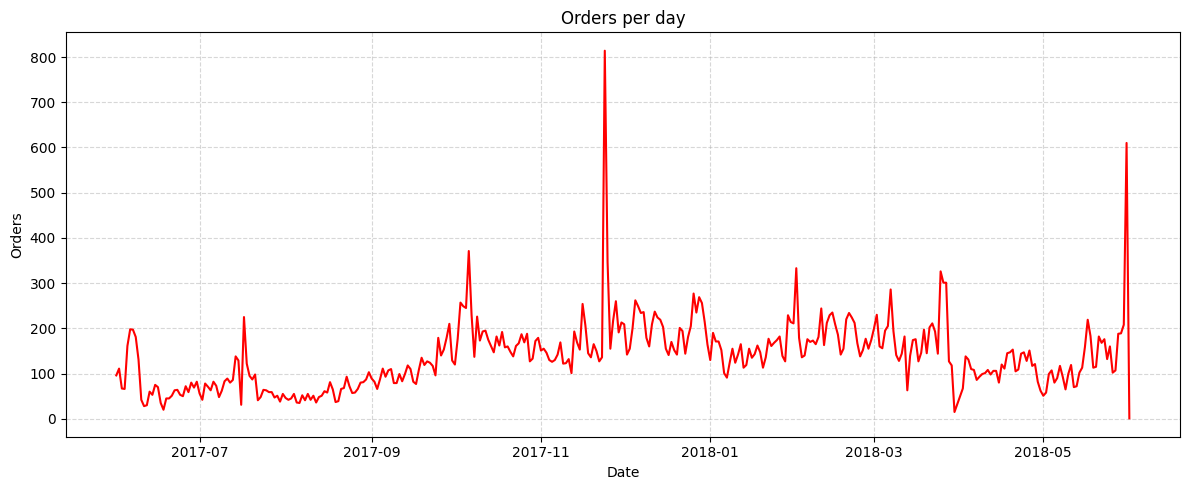

In [17]:
#Ahora graficamos 
plt.figure(figsize=(12,5))
plt.plot(daily_orders['Buy Ts'],daily_orders['Daily orders'],color='red',linewidth=1.5)
plt.title('Orders per day')
plt.xlabel('Date')
plt.ylabel('Orders')
plt.grid(True,linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()

In [18]:
#Ahora revisaremos el comportamiento de manera semanal 
orders['week']=orders['Buy Ts'].dt.to_period('W')
weekly_orders=orders.groupby('week').size().reset_index(name='weekly orders')
weekly_orders['week_start']=weekly_orders['week'].dt.start_time
weekly_orders.head(10)

,week,weekly orders,week_start
0,2017-05-29/2017-06-04,340,2017-05-29
1,2017-06-05/2017-06-11,938,2017-06-05
2,2017-06-12/2017-06-18,343,2017-06-12
3,2017-06-19/2017-06-25,371,2017-06-19
4,2017-06-26/2017-07-02,460,2017-06-26
5,2017-07-03/2017-07-09,477,2017-07-03
6,2017-07-10/2017-07-16,636,2017-07-10
7,2017-07-17/2017-07-23,716,2017-07-17
8,2017-07-24/2017-07-30,381,2017-07-24
9,2017-07-31/2017-08-06,314,2017-07-31


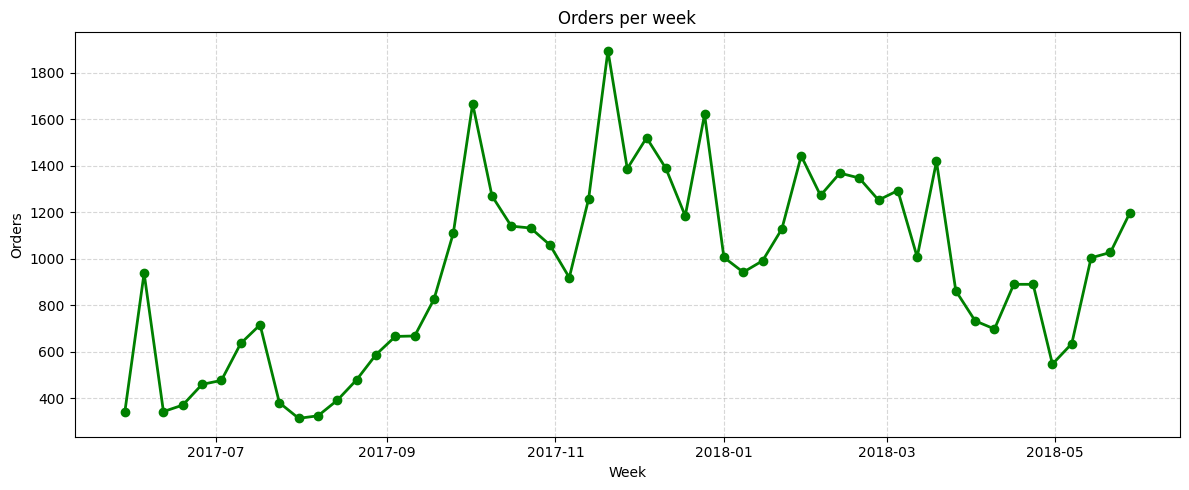

In [19]:
#Ahora graficamos 
plt.figure(figsize=(12, 5))
plt.plot(weekly_orders['week_start'], weekly_orders['weekly orders'],marker='o', color='green', linewidth=2)
plt.title('Orders per week')
plt.xlabel('Week')
plt.ylabel('Orders')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [20]:
#Ahora revisaremos el comportamiento de manera mensual 
orders['month']=orders['Buy Ts'].dt.to_period('M')
monthly_orders=orders.groupby('month').size().reset_index(name='monthly_orders')
monthly_orders['month_start']=monthly_orders['month'].dt.start_time
monthly_orders.head(10)

,month,monthly_orders,month_start
0,2017-06,2354,2017-06-01
1,2017-07,2363,2017-07-01
2,2017-08,1807,2017-08-01
3,2017-09,3387,2017-09-01
4,2017-10,5679,2017-10-01
5,2017-11,5659,2017-11-01
6,2017-12,6218,2017-12-01
7,2018-01,4721,2018-01-01
8,2018-02,5281,2018-02-01
9,2018-03,5326,2018-03-01


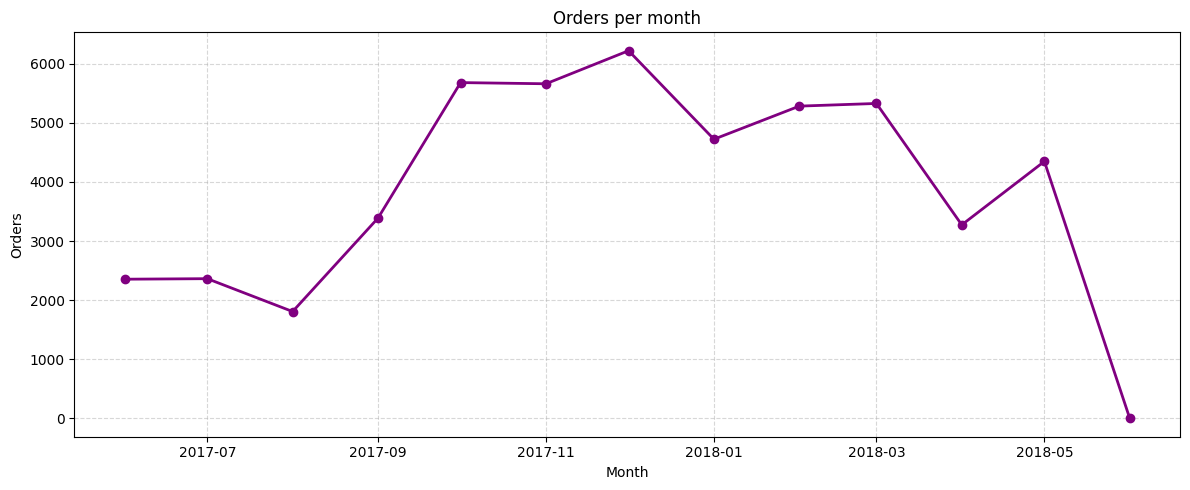

In [21]:
#Ahora graficamos 
plt.figure(figsize=(12, 5))
plt.plot(monthly_orders['month_start'], monthly_orders['monthly_orders'], marker='o', color='purple', linewidth=2)
plt.title('Orders per month')
plt.xlabel('Month')
plt.ylabel('Orders')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### ¿Cuál es el tamaño promedio de compra?

Para evaluar el tamaño promedio de compra, debemos hallar el AOV (Average Order Value), diviendo el ingreso total entre la cantidad de pedidos, datos encontrados en el dataframe orders. 
Adicionalmente, visualizaremos el valor promedio de los pedidos por año y qué año, en promedio, fue el más rentable por pedido. 

In [22]:
#Nos aseguramos que los datos de la columna Revenue estén en formato númerico
orders['Revenue']=pd.to_numeric(orders['Revenue'],errors='coerce')

#Ahora sí, calculamos el AOV
average_order_value=orders['Revenue'].sum()/orders.shape[0]
print("The Average Order Value is:",round(average_order_value,3))

The Average Order Value is: 5.0


<div class="alert alert-success">
<b>Celda [22]</b> <a class="tocSkip"></a><br>
Has calculado correctamente el Average Order Value (AOV), lo cual es fundamental para evaluar el rendimiento económico de las transacciones. Esta métrica te ayudará a entender mejor el valor promedio que cada pedido aporta al negocio.
</div>


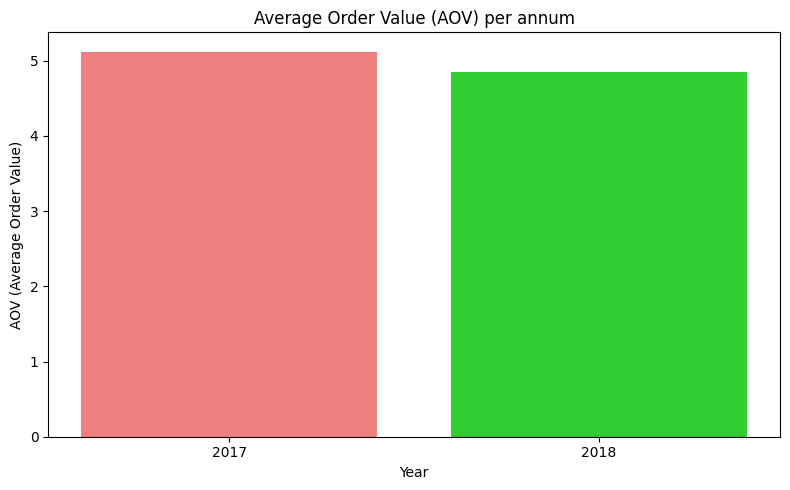

In [23]:
#Agrupamos y calculamos AOV por año
AOV_year = orders.groupby(orders['Buy Ts'].dt.year)['Revenue'].mean().reset_index()
AOV_year.columns = ['Año', 'AOV']

#Convertimos los años a enteros
AOV_year['Año'] = AOV_year['Año'].astype(int)

#Graficamos
colors= ['lightcoral', 'limegreen']
plt.figure(figsize=(8, 5))
plt.bar(AOV_year['Año'], AOV_year['AOV'], color=colors)
plt.title('Average Order Value (AOV) per annum')
plt.xlabel('Year')
plt.ylabel('AOV (Average Order Value)')
plt.xticks(AOV_year['Año'])
plt.tight_layout()
plt.show()

¿Qué podemos analisar al respecto? 
El AOV de 5.0 nos informa que cada pedido, en promedio, genera como ingreso 5 unidades monetarias. 
Asimismo, se videncia que aunque la diferencia no es mucha, el AOV del 2017 es mayor que la del 2018.

### ¿Cuánto dinero traen? (LTV)

In [24]:

# Obtenemos la cohorte de cada usuario: mes de su primera compra
orders['cohort'] = orders.groupby('Uid')['Buy Ts'].transform('min').dt.to_period('M')

# Convertimos a string para visualización
orders['cohort'] = orders['cohort'].astype(str)

# Calculamos los ingresos totales por cohorte
revenue_by_cohort = orders.groupby('cohort')['Revenue'].sum()

# Organizamos los usuarios únicos por cohorte
users_by_cohort = orders.groupby('cohort')['Uid'].nunique()

# LTV por cohorte
ltv_by_cohort = (revenue_by_cohort / users_by_cohort).reset_index()
ltv_by_cohort.columns = ['Cohorte', 'LTV']

# Mostramos como pivot table
pivot_ltv = ltv_by_cohort.pivot_table(index='Cohorte', values='LTV')

pivot_ltv.head(10)


,LTV
Cohorte,
2017-06,11.879234
2017-07,8.386854
2017-08,8.471723
2017-09,13.435227
2017-10,6.360242
2017-11,6.395244
2017-12,7.639913
2018-01,4.940151
2018-02,4.587921


<div class="alert alert-block alert-success">
<b>Celda [24]</b> <a class="tocSkip"></a><br>
El cálculo del LTV por cohorte es apropiado y proporciona información valiosa sobre el valor de los clientes a lo largo del tiempo. 
</div>


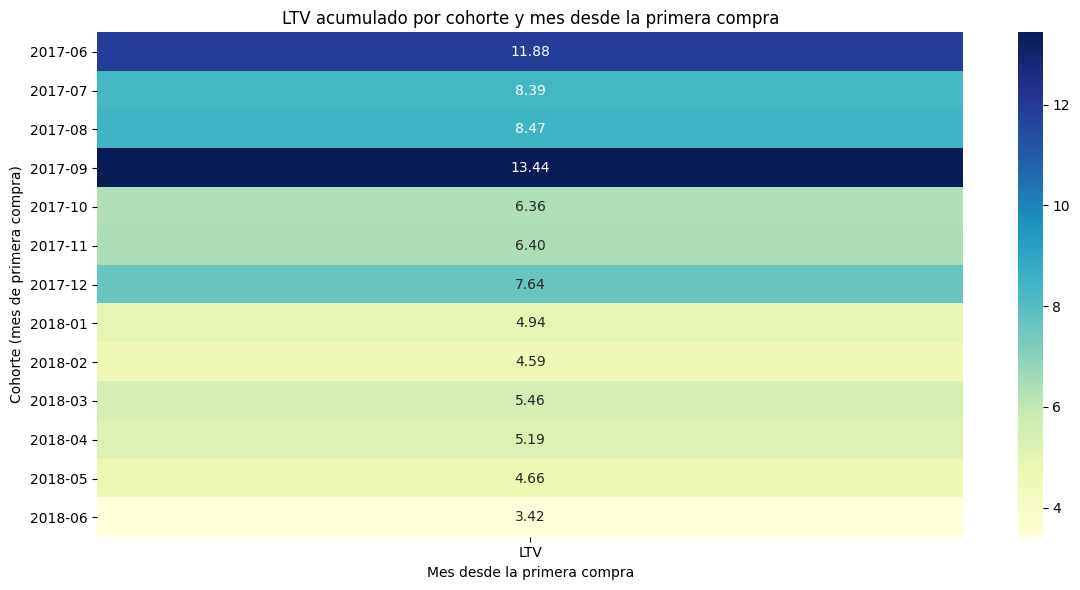

In [25]:
# Elaboramos el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_ltv, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('LTV acumulado por cohorte y mes desde la primera compra')
plt.xlabel('Mes desde la primera compra')
plt.ylabel('Cohorte (mes de primera compra)')
plt.tight_layout()
plt.show()

Tanto en la tabla como en el mapa de calor, es posible evidenciar que el periodo del 2017 tuvo un LTV mayor, es decir, los usuarios en este periodo generaron mayores ingresos. 

# Ahora seguiremos con marketing

### ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/ a lo largo del tiempo)

In [26]:
#El costo total es:
total_cost=costs['costs'].sum()
print(f"Gasto total en marketing: ${total_cost:,.0f}")

Gasto total en marketing: $329,132


In [27]:
#El costo por fuente de adquisición: 
costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()
costs_by_source.head(10)

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [28]:
#Ahora, el costo de marketing de manera mensual

#Extraemos el mes de la visita
visits['cohort']=visits['Start Ts'].dt.to_period('M')
costs['month']=costs['dt'].dt.to_period('M')

#Obetenemos usuarios únicos por cohorte y fuente
users_by_cohort_source= visits.groupby(['cohort','Source Id'])['Uid'].nunique().reset_index()
users_by_cohort_source.columns = ['cohort', 'source', 'users']

#Sumamos los costos de marketing por fuente y mes 
costs_by_source_month=costs.groupby(['month','source_id'])['costs'].sum().reset_index()

#Uniremos los datasets de cohorte y gasto de marketing
merged=pd.merge(users_by_cohort_source,costs_by_source_month,
                left_on=['cohort','source'],right_on=['month','source_id'],how='left')

#Calculamos el CAC
merged['CAC']=merged['costs']/merged['users']

cohort_cac = merged.pivot(index='cohort', columns='source', values='CAC')
cohort_cac.head(10)

source,1,2,3,4,5,6,7,9,10
cohort,,,,,,,,,
2017-06,1.158035,1.584452,1.829543,0.966667,0.901178,NaN,NaN,0.378778,0.735878
2017-07,1.024718,1.314428,1.886522,0.857980,0.804438,NaN,NaN,0.538327,1.043734
2017-08,1.198753,1.420431,1.798460,1.028239,0.694622,NaN,NaN,0.406085,0.953156
2017-09,1.076710,1.401718,1.710481,0.965643,0.780442,NaN,NaN,0.532164,0.917669
2017-10,1.067166,1.446269,1.844280,0.674883,0.766432,NaN,NaN,0.584286,0.677365
2017-11,0.876401,1.251534,1.670789,0.479945,0.972381,NaN,NaN,0.459126,0.892297
2017-12,0.856015,1.323015,1.764142,0.651605,0.943832,NaN,NaN,0.533209,1.040032
2018-01,1.020626,1.312418,1.736286,0.569219,0.936131,NaN,NaN,0.516676,0.664162
2018-02,1.039359,1.416379,1.638103,0.585482,0.852035,NaN,NaN,0.532336,0.441985


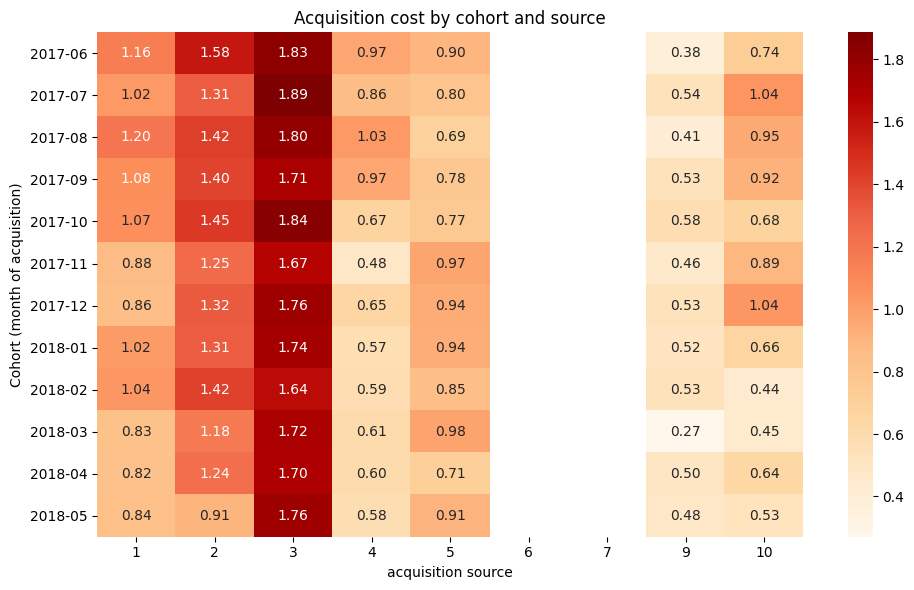

In [29]:
#Ahora lo visualizamos en el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cohort_cac, annot=True, fmt='.2f', cmap='OrRd')
plt.title('Acquisition cost by cohort and source')
plt.xlabel('acquisition source')
plt.ylabel('Cohort (month of acquisition)')
plt.tight_layout()
plt.show()

Con lo anterior, es posible evidenciar periodos de altos gastos, como en el source 3; sin embargo, también se evidencia ausencia de registro en los cohortes 6 y 7, lo que podría deberse a diferentes razones, como ausencia de datos o no registro de gastos en marketing. Siguiendo el patrón, el cohorte 9 no deja ver un gasto bajo y su aumento en el cohorte 10, lo que podría interpretarse como el potenciamiento en inversión apartir de un punto cero (cohorte 6).

### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes? 

Necesitamos conocer el costo de adquisición de clientes (CAC), teniendo en cuenta que en el análisis de cohortes se identificó el CAC, haremos un análisis de promedio de este por source. 
    

In [30]:
# Calcular el promedio por fuente (columna),
avg_cost_per_source = cohort_cac.mean(axis=0)
avg_cost_per_source.head(10)

source
1     0.983589
2     1.315753
3     1.754558
4     0.714108
5     0.854555
6          NaN
7          NaN
9     0.477582
10    0.749059
dtype: float64

En función de lo evidenciado en el anterior heatmap, con la consecución del CAC por source es posible respaldar la afirmación de sources con mayor costo y, por el contrario, otros que no cuentan con registro de costos. 

### ¿Cuán rentables eran las inversiones? (ROMI)

Para medir cuánto dinero Showz ganó por cada peso invertido en marketing, calcularemos el ROMI sumando los ingresos por fuente, usando los datos de el costo por marketing por fuente (ya analizado anteriormente) y así aplicando la fórmula del ROMI. 

Graficaremos el resultado. 

In [31]:
#Calculamos el revenue por fuente

#Unimos visitas con órdenes para conocer la fuente de cada comprador
orders_with_source = orders.merge(visits[['Uid', 'Source Id']], on='Uid', how='left')

#Ingresos por fuente
revenue_by_source = orders_with_source.groupby('Source Id')['Revenue'].sum().reset_index()

costs_by_source.rename(columns={'source_id': 'Source Id'}, inplace=True)
#Calculamos ROMI
romi = revenue_by_source.merge(costs_by_source, on='Source Id')
romi['ROMI'] = (romi['Revenue'] - romi['costs']) / romi['costs']
romi.head(10)

,Source Id,Revenue,costs,ROMI
0,1,2.298200e+06,20833.27,109.313944
1,2,2.638189e+06,42806.04,60.631237
2,3,2.966880e+05,141321.63,1.099381
3,4,4.966902e+05,61073.60,7.132649
4,5,1.181477e+06,51757.10,21.827344
5,9,3.634225e+04,5517.49,5.586736
6,10,1.461923e+04,5822.49,1.510821


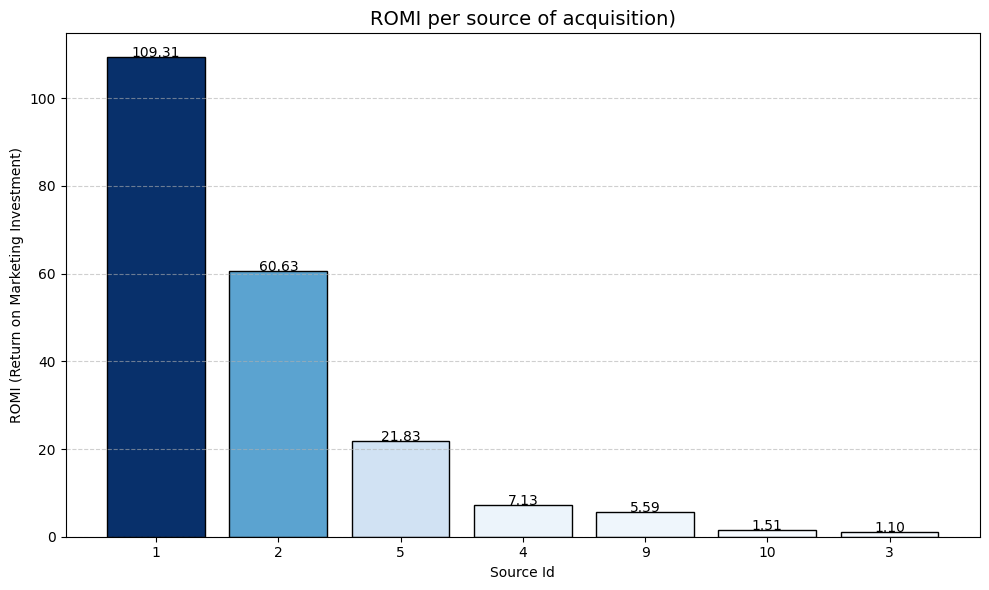

In [32]:
# Ordenamos por ROMI
romi_sorted = romi.sort_values('ROMI', ascending=False).reset_index(drop=True)

# Normalizamos los valores de ROMI para asignar colores
norm = plt.Normalize(romi_sorted['ROMI'].min(), romi_sorted['ROMI'].max())
colors = cm.Blues(norm(romi_sorted['ROMI']))

# Creamos el gráfico
plt.figure(figsize=(10, 6))
bars = plt.bar(romi_sorted['Source Id'].astype(str), romi_sorted['ROMI'], color=colors, edgecolor='black')
plt.title('ROMI per source of acquisition)', fontsize=14)
plt.xlabel('Source Id')
plt.ylabel('ROMI (Return on Marketing Investment)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mostramos valores en las barras
for bar, value in zip(bars, romi_sorted['ROMI']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{value:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
<b>Celda [32]</b> <a class="tocSkip"></a><br>
El gráfico de ROMI es informativo, pero considera agregar una línea de referencia o un análisis adicional para interpretar mejor qué valores de ROMI son considerados buenos o malos en el contexto de tu análisis. Esto proporcionará un marco de referencia claro para evaluar la efectividad de las inversiones en marketing.
</div>


### Conclusiones

Después de este análisis donde pudimos estudiar el comportamiento de los mecanismos de marketing que Showz utiliza y sus intensiones de optimizar los gastos de marketing.

Después de trabajar con la información y el uso de diferentes métricas, se lograron conocer y visualizar diferentes datos de forma diaria, semanal, mensual e incluso anual (para el caso del AOV). 

En lo referente a la optimización de los gastos, nos enfocaremos en ROMI, principalmente, ya que está métrica nos permitió evaluar la eficencia económica de cada fuente y compararlas entre ellas. 

#### ¿Qué fuentes recomendaría? 

Ubicándolas de manera descendente, las fuentes que más recomendaría son las siguientes: 

1. Fuente No. 1.
2. Fuente No. 2.
3. Fuente No. 5.

Estas fuentes destacan por su eficiencia, siendo la primera, mucho más sobresalientes que las otras fuentes evaluadas, lo que la hace altamente rentable.

#### Conclusión general 

Si bien ninguna fuente de marketing usada por Showz genera pérdida a la hora de evalaurla desde diferentes métricas (como LTV, CAC, ROMI), algunas de ellas sobresalen con números impresionantes sobre las demás. 


<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Camilo! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>
• Aplicaste exploración inicial con <code>info()</code> y conversiones de tipo de dato, asegurando una base sólida para el análisis.<br>
• Implementaste cálculos de métricas clave como la duración de sesiones y AOV, mostrando un entendimiento profundo del comportamiento del usuario.<br>
• Usaste técnicas avanzadas como cohortes y análisis de LTV, lo cual es crucial para el análisis de retención y valor del cliente.<br>
• Visualizaste los datos de manera efectiva, aunque hay espacio para mejorar la claridad en algunos gráficos.<br><br>
¡Felicidades!
</div>
